## Calculating Water Surface Temperature using Landsat scenes

This example shows how to obtain the water surface temperature for a single landsat scene.

In [1]:
# importing libraries

import ee
import sys
sys.path.append(r'C:\artigo_temp_lagos\surfacewatertemperature')
from wst import wst
from IPython.display import Image


In [2]:
# Initializing Earth Engine (require account)

try:
    ee.Initialize()
except:
    ee.Authenticate()

### Parameters

In [3]:

# Landsat ID (Collection 2)
ls_id = 'LANDSAT/LC08/C02/T1_L2/LC08_001062_20230906'

# Earth Engine Image
image = ee.Image(ls_id)

# Define a interess area (Ex: Tefé Lake)
tefe_region = ee.Geometry.Polygon([
    [-65.10878916270434,-3.8686571096373545],
    [-64.58556528575122,-3.8686571096373545],
    [-64.58556528575122,-3.166861338316249],
    [-65.10878916270434,-3.166861338316249],
    [-65.10878916270434,-3.8686571096373545]]) 


### RGB Image

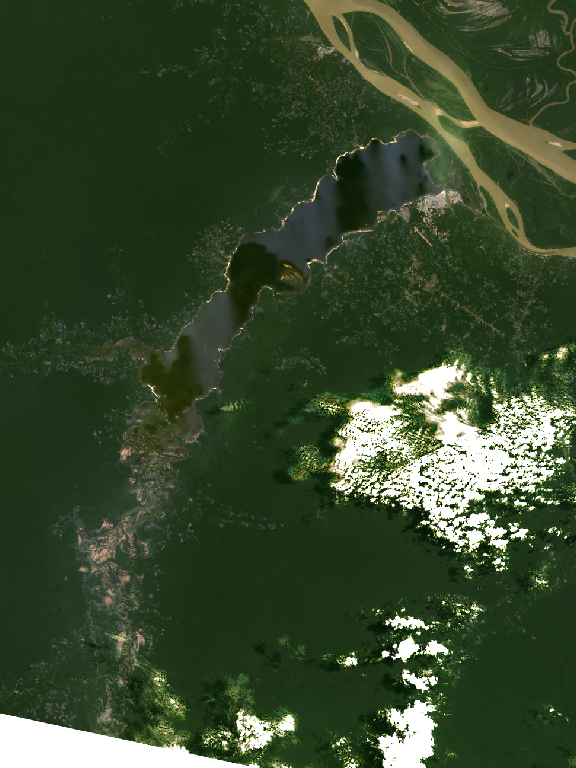

In [4]:
image_url = image.select(['SR_B4', 'SR_B3', 'SR_B2'])\
    .multiply([0.0000275, 0.0000275, 0.0000275])\
    .add([-0.2, -0.2, -0.2])\
    .getThumbURL({'min': 0.0, 'max': 0.23, 
                  'region': tefe_region, 'dimensions': 768})

Image(image_url, embed=True, format='png')

In [5]:
## Water surface temperature

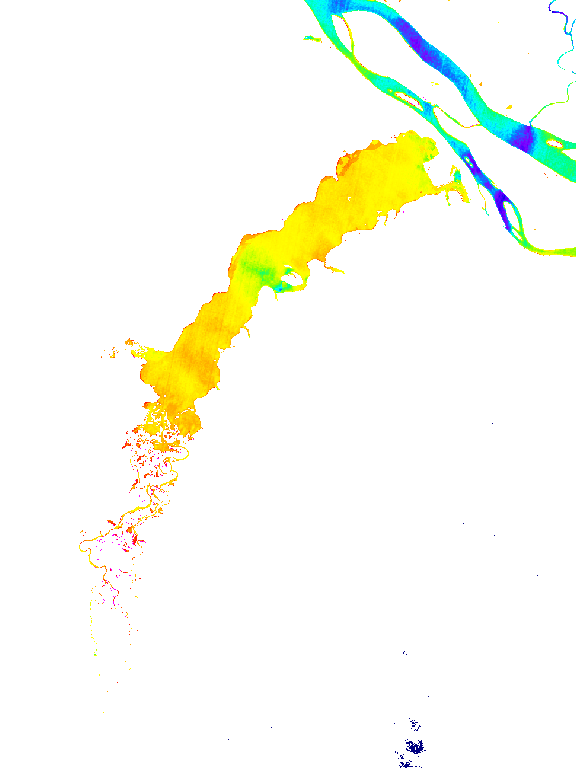

In [6]:
# Get water surface temperafture
# Result is masked only for water bodies (ndwi>0)

lst = wst.Image.from_image_id(ls_id)

# WST pallete
temp_palette = [
    '000080', '0000d9', '4000ff', '8000ff', '0080ff', '00ffff', '00ff80',
    '80ff00', 'daff00', 'ffff00', 'fff500', 'ffda00', 'ffb000', 'ffa400',
    'ff4f00', 'ff2500', 'ff0a00', 'ff00ff'
  ]

image_url = lst.getThumbURL({'min': 300, 'max': 304, 'palette': temp_palette, 
                  'region': tefe_region, 'dimensions': 768})

Image(image_url, embed=True, format='png')